<a href="https://colab.research.google.com/github/viraananda28/Diabetes-Prediction-From-Data-Prep-to-Model-Mastery/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
default_dir = "/content/drive/MyDrive/DS 6"
os.chdir(default_dir)

In [ ]:
!ls

 diabetes.csv  '[Sandbox] Diabetes Prediction (Classification).ipynb'


# Import Libraries

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

# Analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import RobustScaler

# ML Algorithm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model Selection
from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

# Model Training Evaluation
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score
)

# Save Model
import pickle

- RobustScaler: Melakukan scalling dan menggunakan IQR untuk membersihkan outlier.
- Boosting:membuat pohon baru utk memperbaiki pohon yang sudah dibuat.
- Random Forest: Membuat pohon baru dari hasil sampling nya dan dilakukan voting.
- ensemble: gabungan dari beberapa.
- KNN: Memvoting tetangga masuk mana. Kenapa K nya disarankan ganjil? agar ada winnernya, kalau genap nanti sama jadi susah.
- Decision tree: hanya membuat 1 pohon saja. Cenderung overfitting.
-Logistic: memanfaatkan linear regression.
kfold: data training bergantian jadi data validation.
- GridSearch: mengotomisasi secara default parameter terbaik


# 1.&nbsp;Load Dataset

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.2 General Information on Variables

### a. Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



### b. BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

### c. BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

### d. Triceps Skinfolds
For adults, the standard normal values for triceps skinfolds are:
* 18.0mm (women)

# 2.&nbsp;Exploratory Data Analysis

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors
# “Insulin”, ”SkinThickness”, ”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set

# See BMI Min: 0
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# Target Variable: Categorical
df['Outcome'].unique()

array([1, 0])

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# Dilihat dalam persentase
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Data tidak imbalance.
Imbalance spt data churn, e-commerce, ex 98% vs 1% dll.

# 3.&nbsp;Data Visualization

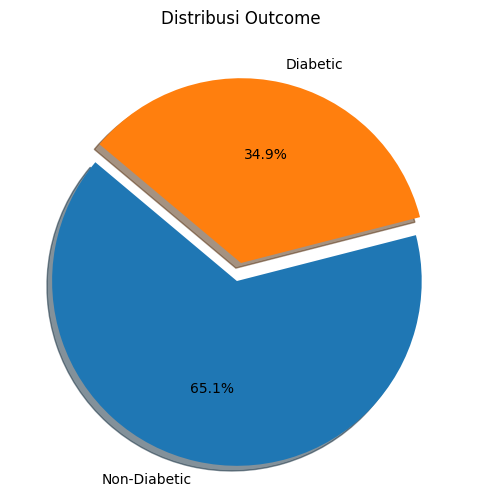

In [ ]:
# Menghitung jumlah setiap status
status_counts = df['Outcome'].value_counts()

# Nilai untuk meledak (explode)
explode = [0.1 if status == 0 else 0 for status in status_counts.index]

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(
    status_counts,
    labels=['Non-Diabetic', 'Diabetic'],
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=140
)
plt.title('Distribusi Outcome')
plt.show()

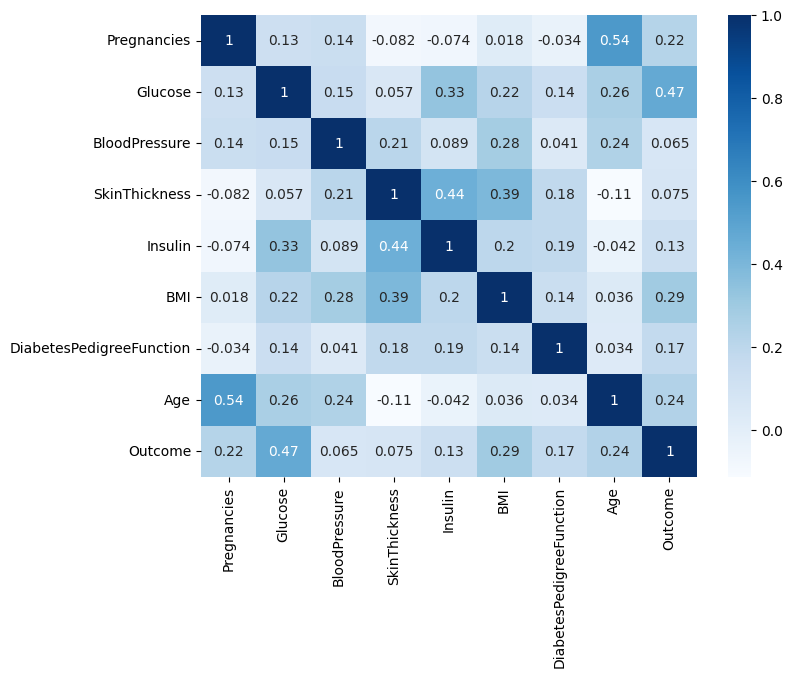

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
);

In [ ]:
# df.nlargest(10, 'BloodPressure')

In [ ]:
# df.corr()

In [ ]:
k = 10
k_largest_corr = df.corr().nlargest(k, 'Outcome')
k_largest_feats = k_largest_corr['Outcome'].index
list(k_largest_feats)

['Outcome',
 'Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'Insulin',
 'SkinThickness',
 'BloodPressure']

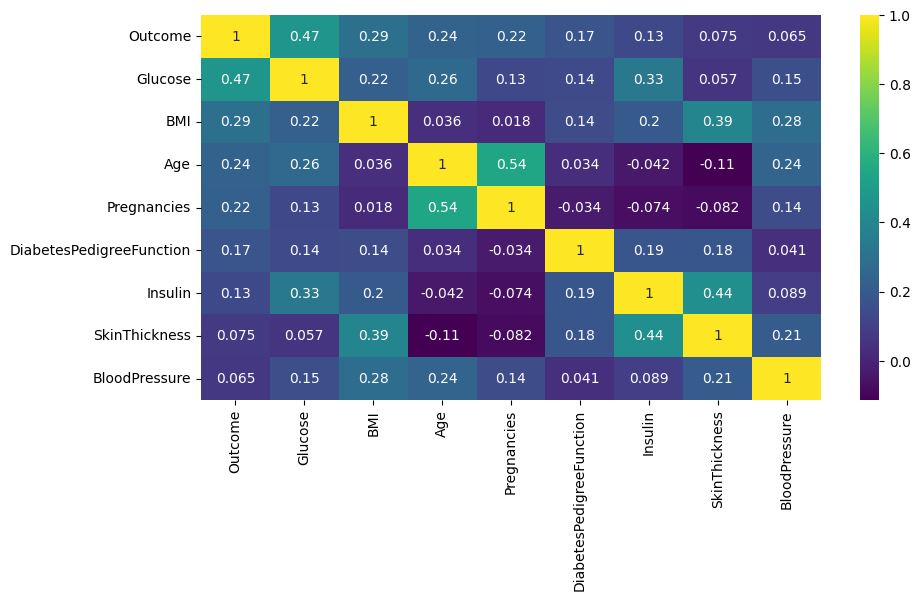

In [ ]:
# Outcome correlation matrix

k = 9 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
corr_mat = df[cols].corr()

# Visualize
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_mat,
    cmap='viridis',
    annot=True,
);

korelasi itu dari -1 sampai dengan 1, jika menuju kedua angka ini maka korelasinya kuat. Jika menuju 0 maka korelasi nya lemah dan bisa saja diabaikan.
Sifat korelasi:
Korelasi positif: Saling mempengaruhi secara positif
korelasi negatif: Saling mempengaruhi secara negatif

In [ ]:
# df.loc[df.Pregnancies==12]

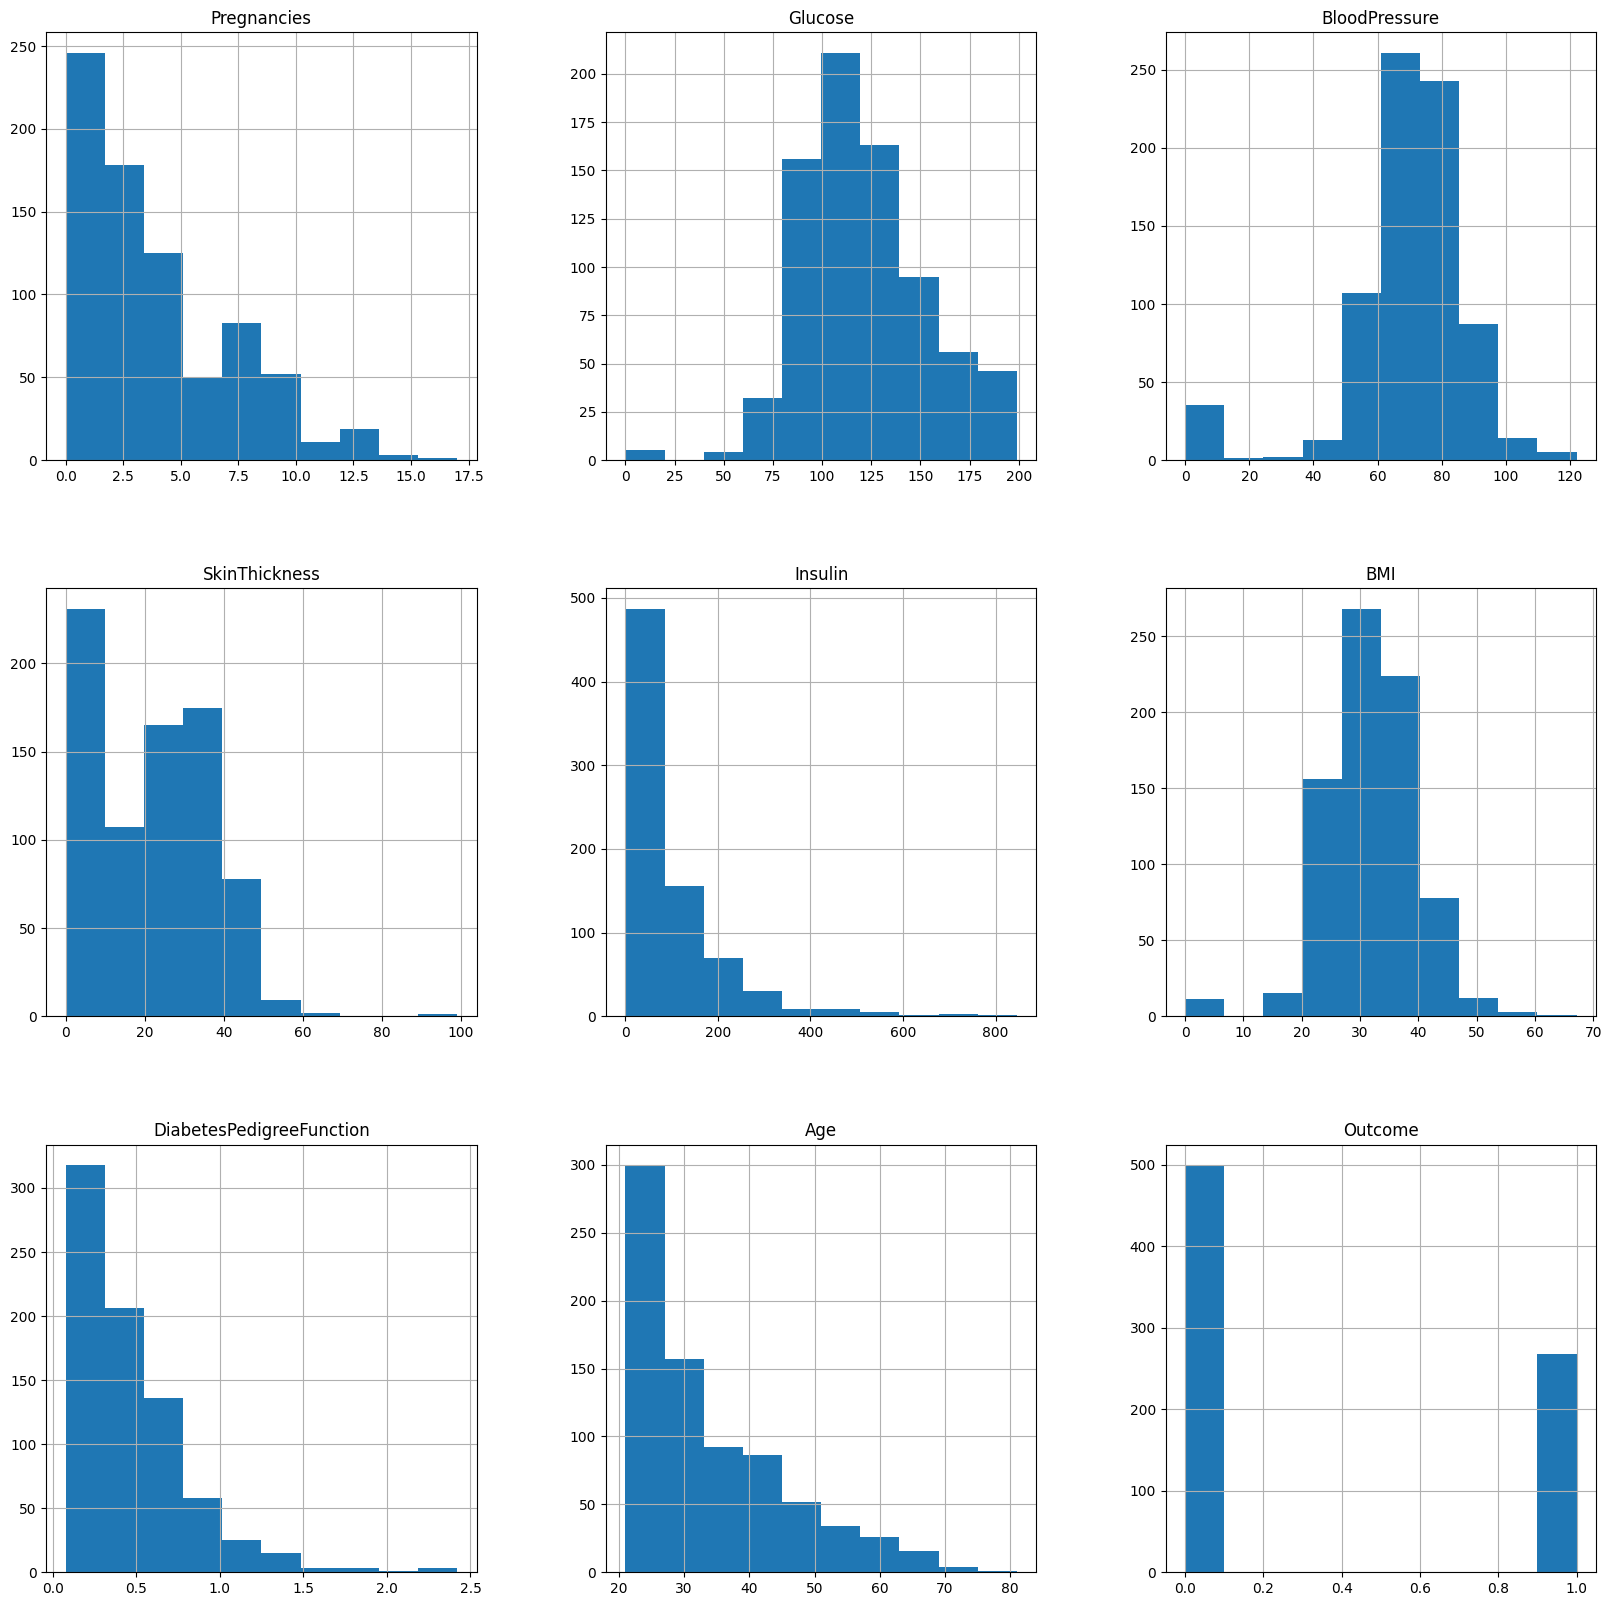

In [ ]:
# see how the data is distributed.
df.hist(figsize=(20,20));

Pregnancies: menceng kanan (bagian yang sedikitnya sebelah kanan)
Glucose: cukup bagus karena ada pemusatan.
Bloodpressure & BMI: ada data anomali (yang 0).


In [ ]:
df['Age'].mean(), df['Age'].median()

(33.240885416666664, 29.0)

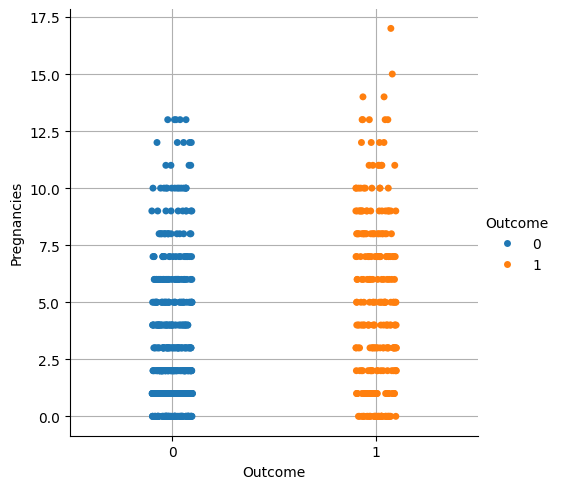

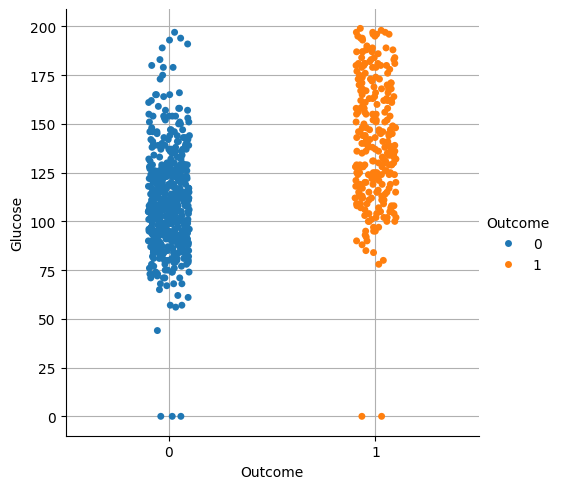

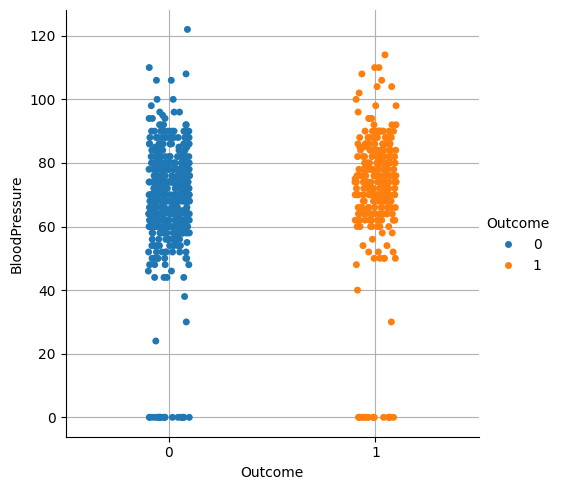

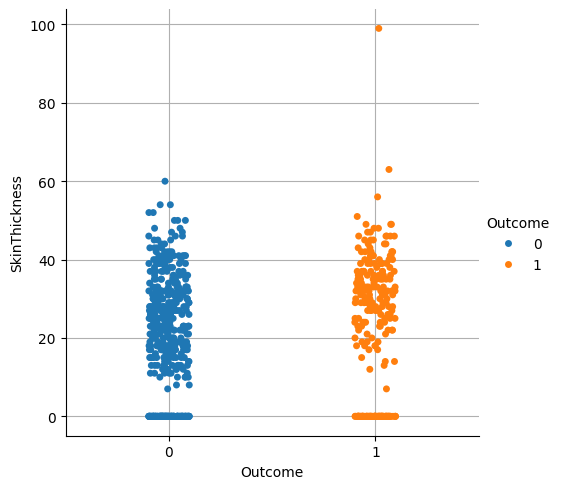

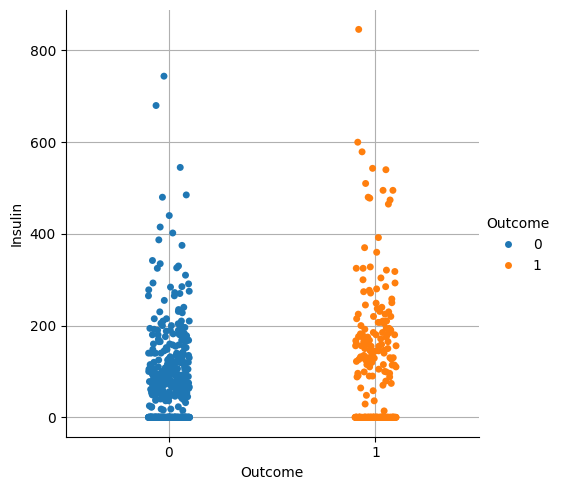

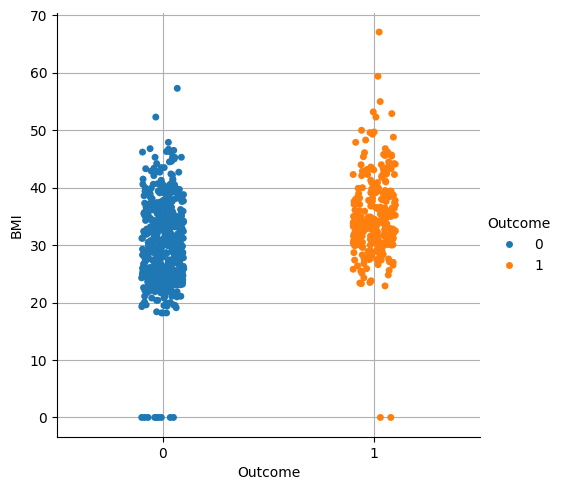

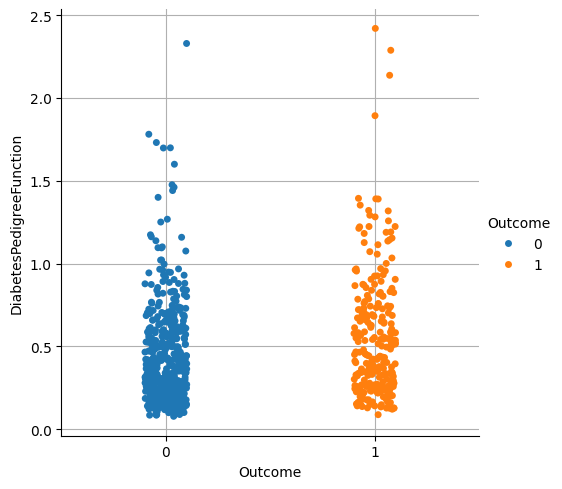

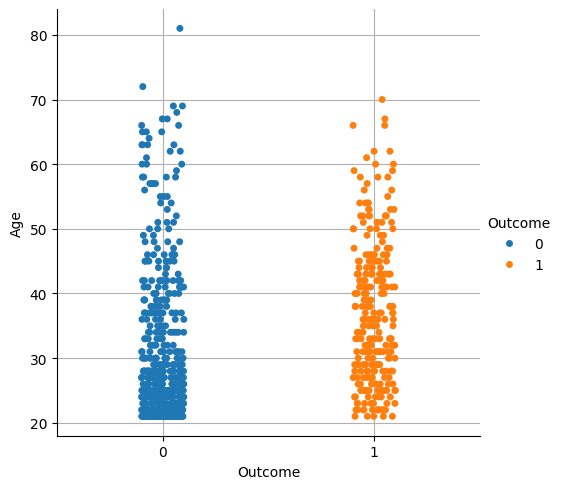

In [ ]:
# Kategorikal Plot
for col in df.columns:
    if col != "Outcome":
        sns.catplot(
            data=df, x="Outcome",
            y=col, hue="Outcome")
        plt.grid()

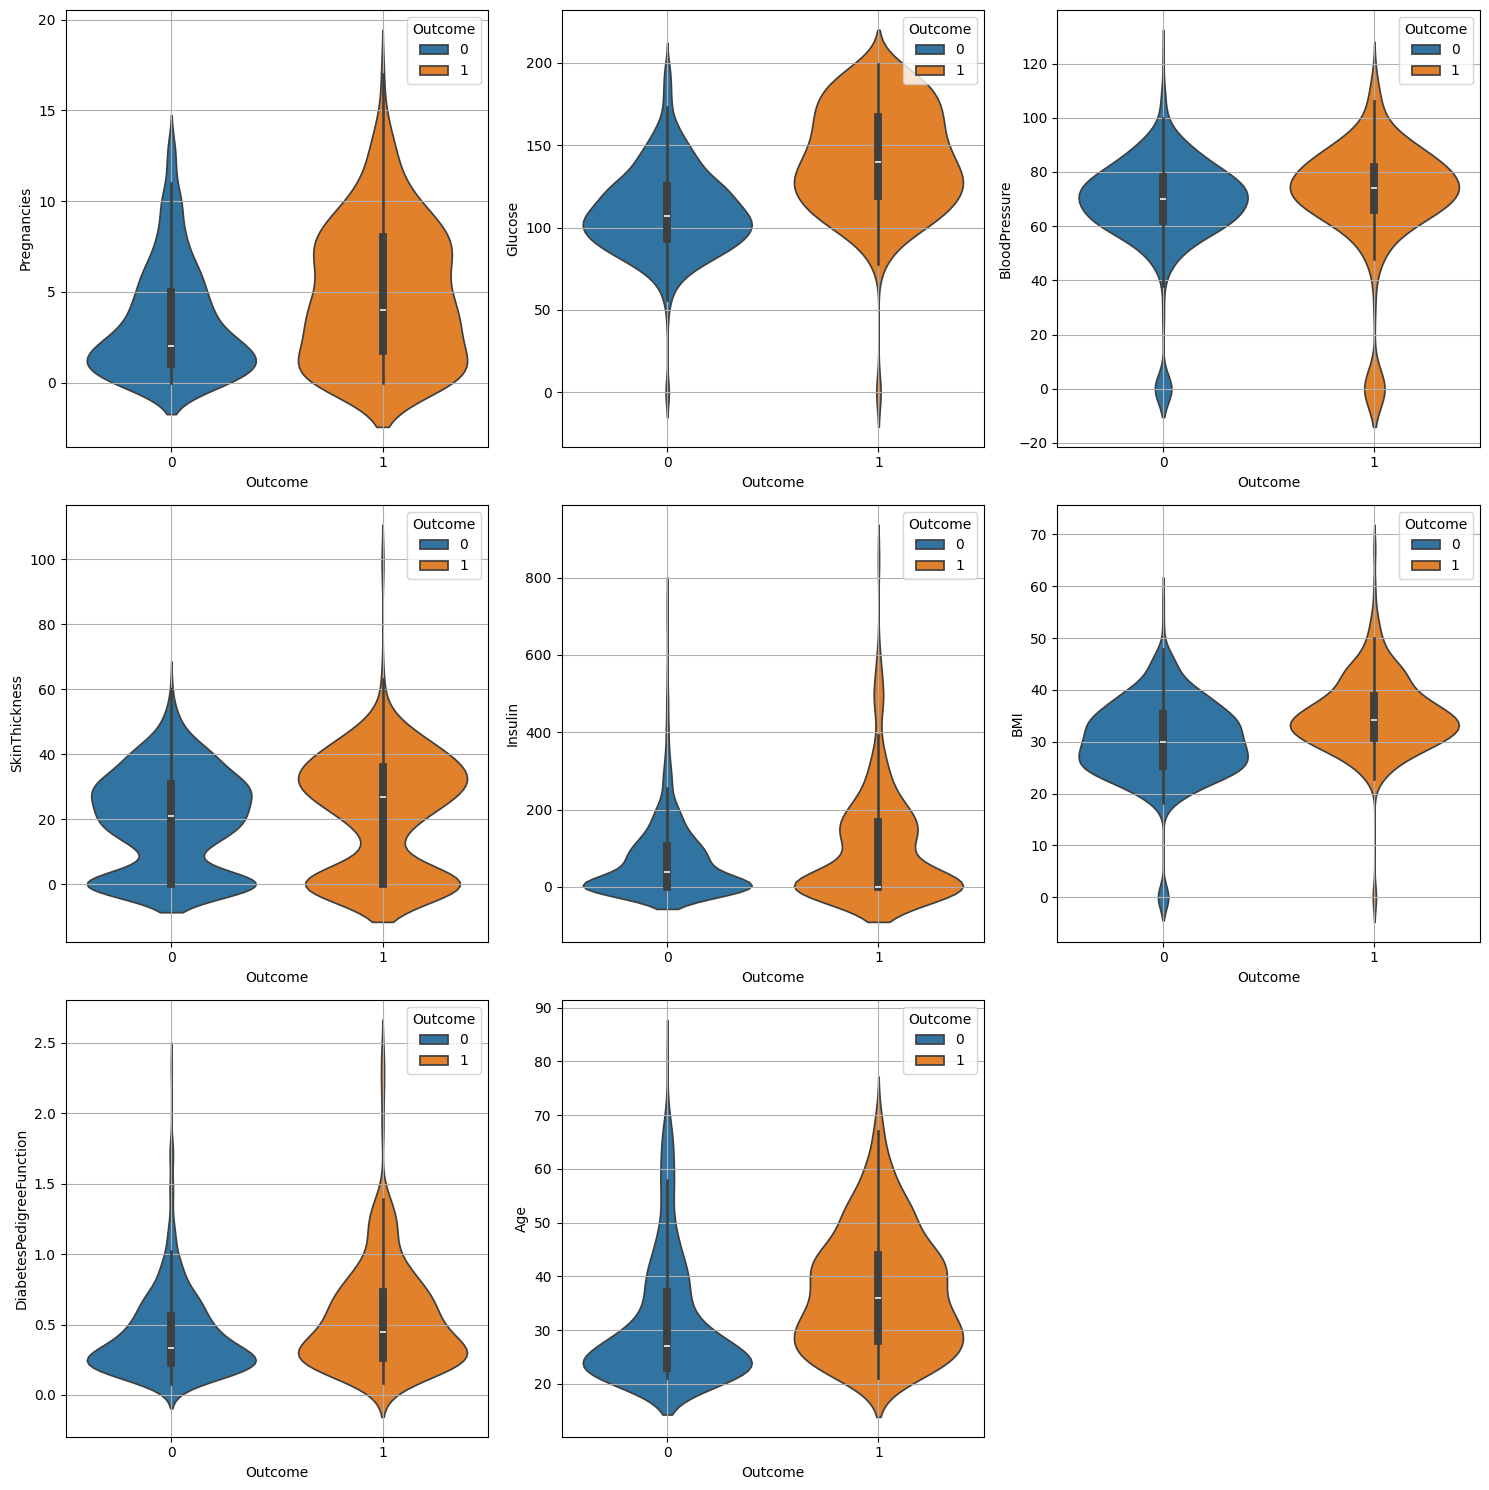

In [ ]:
# Inisialisasi figure dan axes untuk grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten untuk memudahkan iterasi

# Counter untuk subplot
plot_number = 0

# Loop melalui kolom dataframe
for col in df.columns:
    if col != "Outcome":
        # Pilih subplot yang sesuai
        ax = axes[plot_number]

        # Buat violinplot
        sns.violinplot(data=df, x="Outcome", y=col, hue="Outcome", ax=ax)

        # Tambahkan grid
        ax.grid(True)

        # Increment plot number
        plot_number += 1

        # Berhenti jika sudah melebihi jumlah subplot yang tersedia
        if plot_number == 9:
            break

# Hapus subplot yang tidak terpakai
for i in range(plot_number, 9):
    fig.delaxes(axes[i])

# Layout yang lebih rapi
plt.tight_layout()
plt.show()

Violin plo: memunculkan boxplot sekaligus Pada lekukan itu terdapat distribusi.

# 4.&nbsp;Data Preprocessing

In [ ]:
# Observation units for variables with a minimum value of zero are NaN,
# except for the pregnancy variable.
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


## Handling Missing Values: Imputation

In [ ]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)

In [ ]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#df["Outcome"] == 0

In [ ]:
# We can fill in NaN values with a median
# according to the target value

cols = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

mask_label_zero = (df["Outcome"] == 0) # Non-Diabetic
mask_label_one = (df["Outcome"] == 1) # Diabetic

for col in cols:
    mask_col_null = df[col].isnull()
    col_median_zero = df[mask_label_zero][col].median()
    col_median_one = df[mask_label_one][col].median()

    df.loc[(mask_label_zero & mask_col_null), col] = col_median_zero
    df.loc[(mask_label_one & mask_col_null), col] = col_median_one

Missing value diganti dengan median.

Best practice yg bisa dicoba: Split data train dan test, Data train diambil median untuk diabetes dan non, pada data test diinputasi dengan median dari data train nya.

Median utk data nurikal, mean utk data kategorikal.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# df[(df['Pregnancies'] == 1)].any(axis=0)
# df[(df['Pregnancies'] == 1)].any(axis=None)
# (df['Pregnancies'] == 1).all(axis=None)

## Outlier Handling

In [ ]:
def outlier_thresholds(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):

    Q1 = df[feature].quantile(quantile_lower)
    Q3 = df[feature].quantile(quantile_upper)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

In [ ]:
def has_outliers(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):
    """
    Args:
        df (pd.DataFrame): DataFrame containing feature
        feature (str): feature name to be checked
        quantile_lower: Manually set the point for Q1, default: 0.25
        quantile_upper: Manually set the point for Q3, default: 0.75

    Return:
        bool: Is outlier(s) exist in given feature in the DataFrame
    """
    low_lim, up_lim = outlier_thresholds(
        df, feature, quantile_lower, quantile_upper)

    exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
    exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

    return (exist_lower_outliers or exist_upper_outliers)

Mengecek apakah ada outlier dalam kolom tersebut.

In [ ]:
feats_with_outliers = []

for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")
        feats_with_outliers.append(feat)

Outliers exist in SkinThickness!
Outliers exist in Insulin!
Outliers exist in DiabetesPedigreeFunction!


In [ ]:
feats_with_outliers

['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

Hanya kolom ini yang diinputasi

In [ ]:
def replace_with_thresholds(df, numerical_feats):
    for feat in numerical_feats:
        low_limit, up_limit = outlier_thresholds(df, feat)

        mask_lower = (df[feat] < low_limit)
        mask_upper = (df[feat] > up_limit)

        df.loc[mask_lower, feat] = low_limit
        df.loc[mask_upper, feat] = up_limit

In [ ]:
replace_with_thresholds(df, feats_with_outliers)

In [ ]:
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.000,17.0
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.000,199.0
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.000,122.0
SkinThickness,768.0,28.848307,7.559161,14.500,14.67500,25.00000,28.0000,32.00000,40.0000,42.50000,42.500,42.5
Insulin,768.0,133.085938,58.124185,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,270.00000,270.000,270.0
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.759,67.1
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.200,1.2
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.000,1.0


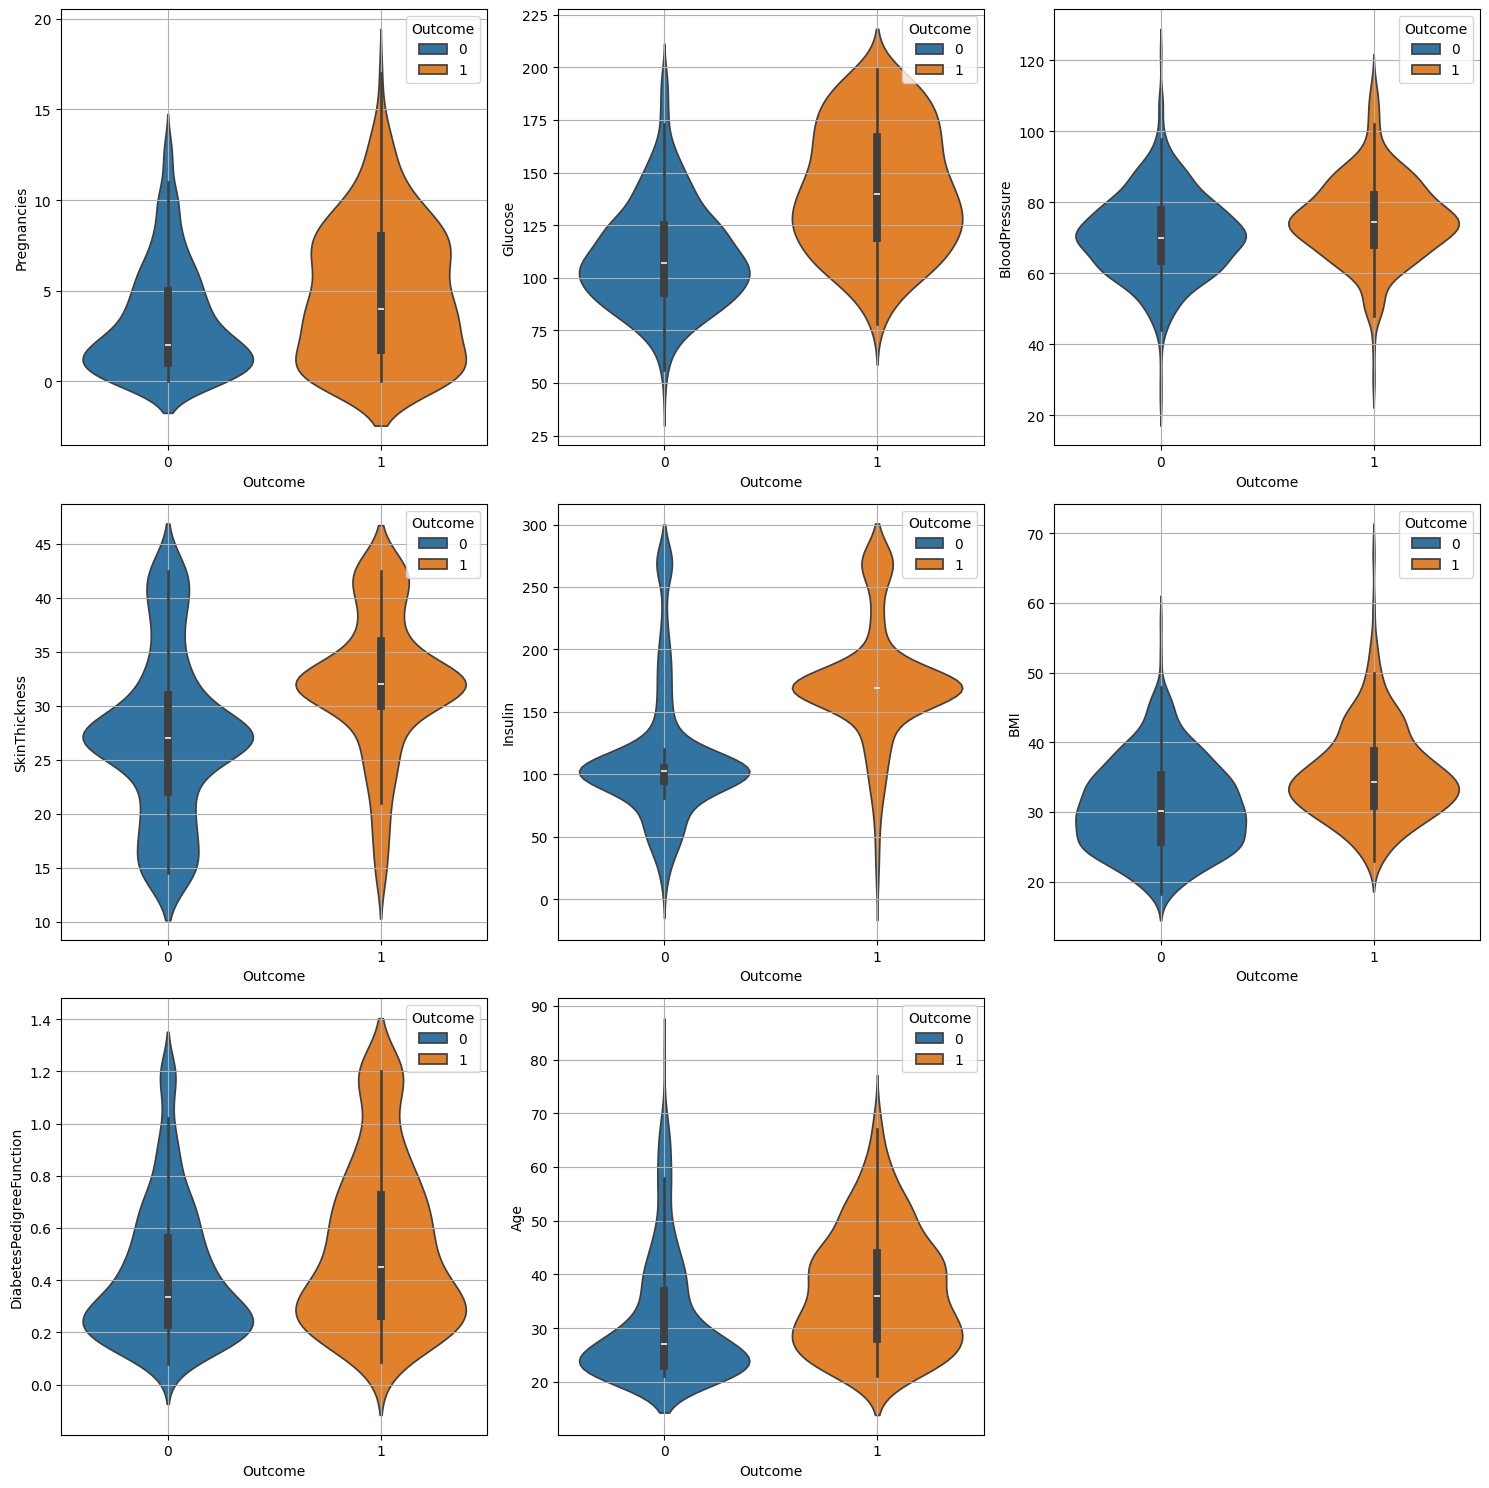

In [ ]:
# Inisialisasi figure dan axes untuk grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten untuk memudahkan iterasi

# Counter untuk subplot
plot_number = 0

# Loop melalui kolom dataframe
for col in df.columns:
    if col != "Outcome":
        # Pilih subplot yang sesuai
        ax = axes[plot_number]

        # Buat violinplot
        sns.violinplot(data=df, x="Outcome", y=col, hue="Outcome", ax=ax)

        # Tambahkan grid
        ax.grid(True)

        # Increment plot number
        plot_number += 1

        # Berhenti jika sudah melebihi jumlah subplot yang tersedia
        if plot_number == 9:
            break

# Hapus subplot yang tidak terpakai
for i in range(plot_number, 9):
    fig.delaxes(axes[i])

# Layout yang lebih rapi
plt.tight_layout()
plt.show()

# 5.&nbsp;Feature Engineering

See 1.1 & 1.2

## Feature Categorization

In [ ]:
max(df['Glucose'])

199.0

In [ ]:
df['New_Glucose_Class'] = pd.cut(
    x=df['Glucose'],
    bins=[0, 139, 200],
    labels=["Normal", "Pre-Diabetes"]
)

Cut untuk membagi datanya.

In [ ]:
df['New_Glucose_Class'].value_counts(normalize=True)

New_Glucose_Class
Normal          0.740885
Pre-Diabetes    0.259115
Name: proportion, dtype: float64

In [ ]:
df['New_BMI_Range'] = pd.cut(
    x=df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

df['New_BMI_Range'].value_counts(normalize=True)

New_BMI_Range
Obese          0.628906
Overweight     0.233073
Healthy        0.132812
Underweight    0.005208
Name: proportion, dtype: float64

In [ ]:
df['New_BloodPressure'] = pd.cut(
    x=df['BloodPressure'],
    bins=[0, 79, 89, 123],
    labels=["Normal", "HS1", "HS2"]
)

df['New_BloodPressure'].value_counts(normalize=True)

New_BloodPressure
Normal    0.733073
HS1       0.188802
HS2       0.078125
Name: proportion, dtype: float64

In [ ]:
df['New_SkinThickness'] = (
    df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)
)

In [ ]:
df['New_SkinThickness'].value_counts(normalize=True)

New_SkinThickness
0    0.878906
1    0.121094
Name: proportion, dtype: float64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Pre-Diabetes,Obese,Normal,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal,Overweight,Normal,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Pre-Diabetes,Healthy,Normal,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,Overweight,Normal,0
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Normal,Obese,Normal,0


## One-Hot Encoding

In [ ]:
def one_hot_encoder(
        df, categorical_feats,
        nan_as_category=False
    ):

    original_columns = list(df.columns)

    df = pd.get_dummies(
        df,
        columns=categorical_feats,
        dummy_na=nan_as_category,
        drop_first=True,
        dtype=int
    )

    new_columns = [col for col in df.columns if col not in original_columns]
    return df, new_columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   New_Glucose_Class         768 non-null    category
 10  New_BMI_Range             768 non-null    category
 11  New_SkinThickness         768 non-null    int64   
dtypes: category(2), float64(6), int64(4)
memory usage: 61.9 KB


In [ ]:
categorical_feats = [feat for feat in df.columns if len(df[feat].unique()) <= 10 and feat != "Outcome"]
categorical_feats

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [ ]:
df, new_cols_ohe = one_hot_encoder(df, categorical_feats)
new_cols_ohe

['New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,1,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,1,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,0,0,0,1,0,0,0


## Feature Scaling

In [ ]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]

no_need_to_scaled = new_cols_ohe + ["Outcome"] + like_num

cols_need_scale = [col for col in df.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:\n", cols_need_scale)

rs = RobustScaler()
df.loc[:, cols_need_scale] = rs.fit_transform(df[cols_need_scale])
print("Feature Scaling, Done!")

List of columns that need to be scaled:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature Scaling, Done!


In [ ]:
like_num

['Outcome',
 'New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,1,1,0,0,1,0,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,0,0,0,1,0,0,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,1,1,1,0,0,0,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,0,0,0,1,0,0,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,2.163399,0.235294,1,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pregnancies                     768 non-null    float64
 1   Glucose                         768 non-null    float64
 2   BloodPressure                   768 non-null    float64
 3   SkinThickness                   768 non-null    float64
 4   Insulin                         768 non-null    float64
 5   BMI                             768 non-null    float64
 6   DiabetesPedigreeFunction        768 non-null    float64
 7   Age                             768 non-null    float64
 8   Outcome                         768 non-null    int64  
 9   New_Glucose_Class_Pre-Diabetes  768 non-null    int64  
 10  New_BMI_Range_Healthy           768 non-null    int64  
 11  New_BMI_Range_Overweight        768 non-null    int64  
 12  New_BMI_Range_Obese             768 

In [ ]:
df.to_csv("df_prep.csv", index = False)

# 6.&nbsp;Modeling

## Notes: Metric Evaluation

See [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

The choice between micro-average, macro-average, or weighted-average in the classification_report from scikit-learn depends on your specific use case and the characteristics of your data. Each average type provides a different perspective on the overall model performance.

Here's a brief explanation of each average type:

1. **Micro-average:**

    Calculates metrics globally by considering all instances together.

    Suitable when classes are imbalanced, and you want to treat all instances equally.
    Gives equal weight to each data point, regardless of class.

2. **Macro-average:**

    Calculates metrics for each class independently and then takes the unweighted average.

    Suitable when you want to evaluate the overall performance across all classes without considering class imbalances.
    Gives equal weight to each class, regardless of the number of instances in each class.

3. **Weighted-average:**

    Calculates metrics for each class independently and then takes the average, weighted by the number of true instances for each class.

    Suitable when classes are imbalanced, and you want to give more importance to the performance on larger classes.
    Provides a balanced view of the overall performance by accounting for class imbalances.

In summary:

- Use micro-average when you want to treat all instances equally, especially in the presence of class imbalances.

- Use macro-average when you want to evaluate the overall performance without considering class imbalances.

- Use weighted-average when you want to account for class imbalances and give more importance to the larger classes.


It's essential to choose the appropriate average based on the goals of your analysis and the nature of your data.

In some cases, you may need to consider multiple metrics and averages to get a comprehensive understanding of your model's performance.

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,      # 10% for testing
    stratify=y,         # Stratified sampling based on labels
    random_state=42     # Random seed for reproducibility
)

In [ ]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y test:", y_test.value_counts(normalize=True))

y train: Outcome
0    0.65123
1    0.34877
Name: proportion, dtype: float64


y test: Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVC', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('LightGB', LGBMClassifier())
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_train, y_train,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

[LightGBM] [Info] Number of positive: 213, number of negative: 408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342995 -> initscore=-0.649975
[LightGBM] [Info] Start training from score -0.649975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
model_perf

{'LR': {'accuracy': {'train_mean': 0.8075569358178054,
   'train_std': 0.035325698281634614},
  'f1_macro': {'train_mean': 0.7746470703039176,
   'train_std': 0.04489145977864134},
  'precision_macro': {'train_mean': 0.7948406845484246,
   'train_std': 0.05072317931244022},
  'recall_macro': {'train_mean': 0.7661154739092566,
   'train_std': 0.04555647633845367}},
 'KNN': {'accuracy': {'train_mean': 0.8292546583850932,
   'train_std': 0.029411838055861853},
  'f1_macro': {'train_mean': 0.8028127544474424,
   'train_std': 0.03934714215944656},
  'precision_macro': {'train_mean': 0.8183954102911797,
   'train_std': 0.04481523958357436},
  'recall_macro': {'train_mean': 0.7965522383861849,
   'train_std': 0.03876571718693065}},
 'CART': {'accuracy': {'train_mean': 0.8349896480331263,
   'train_std': 0.03632404723049294},
  'f1_macro': {'train_mean': 0.8188271064548951,
   'train_std': 0.03714018654712127},
  'precision_macro': {'train_mean': 0.825353034126471,
   'train_std': 0.0464323076

In [ ]:
focus_metric = 'recall_macro'
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,LR,0.766115,0.045556
1,KNN,0.796552,0.038766
2,CART,0.822888,0.052489
3,RF,0.845104,0.052155
4,SVC,0.838169,0.041383
5,XGBM,0.853538,0.047738
6,GB,0.849802,0.061721
7,LightGB,0.858290,0.049949


Fokus kepada precision atau recall? resiko mana yang bisa dipilih.
Disini memilih recall karena akan sangat bahaya jika yang sakit tapi hasil prediksinya tidak sakit.
recall: Jika konsen dengan yang positifnya.

In [ ]:
# Fokus meningkatkan recall
eval_result.sort_values(
    by=['train_avg_recall_macro', 'train_stddev_recall_macro'],
    ascending=[False, True]
)

,model_type,train_avg_recall_macro,train_stddev_recall_macro
7,LightGB,0.858290,0.049949
5,XGBM,0.853538,0.047738
6,GB,0.849802,0.061721
3,RF,0.845104,0.052155
4,SVC,0.838169,0.041383
2,CART,0.822888,0.052489
1,KNN,0.796552,0.038766
0,LR,0.766115,0.045556


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print or use the test set scores as needed
print(f"Test Set Accuracy  : {accuracy_test:.4f}")
print(f"Test Set Precision : {precision_test:.4f}")
print(f"Test Set Recall    : {recall_test:.4f}")
print(f"Test Set F1 Score  : {f1_test:.4f}")

Test Set Accuracy  : 0.9091
Test Set Precision : 0.8980
Test Set Recall    : 0.9044
Test Set F1 Score  : 0.9010


## 6.1 Model Hyper-Parameter Tuning

In [ ]:
# Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()

# Model Tuning
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500, 1000],
    "subsample": [1, 0.5, 0.8]
}

gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(gbm_cv_model.best_params_)

# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}


In [ ]:
# LightGBM:
lgb_model = LGBMClassifier()

# Model Tuning
lgbm_params = {
    "learning_rate": [0.01, 0.5, 1],
    "n_estimators": [200, 500, 1000],
    "max_depth": [6, 8, 10],
    "colsample_bytree": [1, 0.4, 0.5]
}

lgbm_cv_model = GridSearchCV(
    lgb_model,
    lgbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(lgbm_cv_model.best_params_)

# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
# XGB
xgb_model = XGBClassifier()

# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}

xgb_cv_model = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(xgb_cv_model.best_params_)

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
    #...,
    #...,
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_training_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=5, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_test, y_test,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_training_perf[name] = results

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## 6.2 Model Training Evaluation

In [ ]:
import os
os.makedirs("models")

In [ ]:
# Define the list of models with their names
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
]

# Iterate over each model in the list
for model_name, model in models:
    # Specify the file path where you want to save the model
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle.dump() to serialize and save the model to the file
        pickle.dump(model, file)

In [ ]:
model_training_perf

{'RF': {'accuracy': {'train_mean': 0.8699999999999999,
   'train_std': 0.042360883423796104},
  'f1_macro': {'train_mean': 0.8415837104072399,
   'train_std': 0.05056138104396376},
  'precision_macro': {'train_mean': 0.8414213564213565,
   'train_std': 0.056810503157353816},
  'recall_macro': {'train_mean': 0.8635439560439562,
   'train_std': 0.06652866054258229}},
 'GBM': {'accuracy': {'train_mean': 0.8200000000000001,
   'train_std': 0.12186057606953941},
  'f1_macro': {'train_mean': 0.7943362606120044,
   'train_std': 0.1383551080799457},
  'precision_macro': {'train_mean': 0.7781746031746032,
   'train_std': 0.10963015311104621},
  'recall_macro': {'train_mean': 0.8270879120879121,
   'train_std': 0.13254387998127265}},
 'LightGBM': {'accuracy': {'train_mean': 0.805,
   'train_std': 0.058118652580542336},
  'f1_macro': {'train_mean': 0.76924244056597,
   'train_std': 0.06855925770929648},
  'precision_macro': {'train_mean': 0.7955916305916306,
   'train_std': 0.09785991234765211},


In [ ]:
file_path = "model_training_perf.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(model_training_perf, file)

In [ ]:
# Open the file in binary read mode
with open('model_training_perf.pkl', 'rb') as file:
    # Use pickle.load() to deserialize and load the model from the file
    model_training_perf = pickle.load(file)

In [ ]:
model_training_perf_df = pd.concat(
    {
        k: pd.DataFrame.from_dict(v, 'index') for k, v in model_training_perf.items()
    },
    axis=0
)

model_training_perf_df.index.rename(
    ['model_name', 'eval_metric'],
    inplace=True
)

model_training_perf_df

train_mean  train_std
model_name eval_metric                           
RF         accuracy           0.870000   0.042361
           f1_macro           0.841584   0.050561
           precision_macro    0.841421   0.056811
           recall_macro       0.863544   0.066529
GBM        accuracy           0.820000   0.121861
           f1_macro           0.794336   0.138355
           precision_macro    0.778175   0.109630
           recall_macro       0.827088   0.132544
LightGBM   accuracy           0.805000   0.058119
           f1_macro           0.769242   0.068559
           precision_macro    0.795592   0.097860
           recall_macro       0.775733   0.051346
XGB        accuracy           0.792500   0.073333
           f1_macro           0.743650   0.093142
           precision_macro    0.801219   0.118733
           recall_macro       0.748040   0.079816

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
train_viz_data = (
    model_training_perf_df
    .loc[(slice(None), slice(None)), :].
    train_mean
    .reset_index()
)

train_viz_data

,model_name,eval_metric,train_mean
0,RF,accuracy,0.870000
1,RF,f1_macro,0.841584
2,RF,precision_macro,0.841421
3,RF,recall_macro,0.863544
4,GBM,accuracy,0.820000
5,GBM,f1_macro,0.794336
6,GBM,precision_macro,0.778175
7,GBM,recall_macro,0.827088
8,LightGBM,accuracy,0.805000
9,LightGBM,f1_macro,0.769242


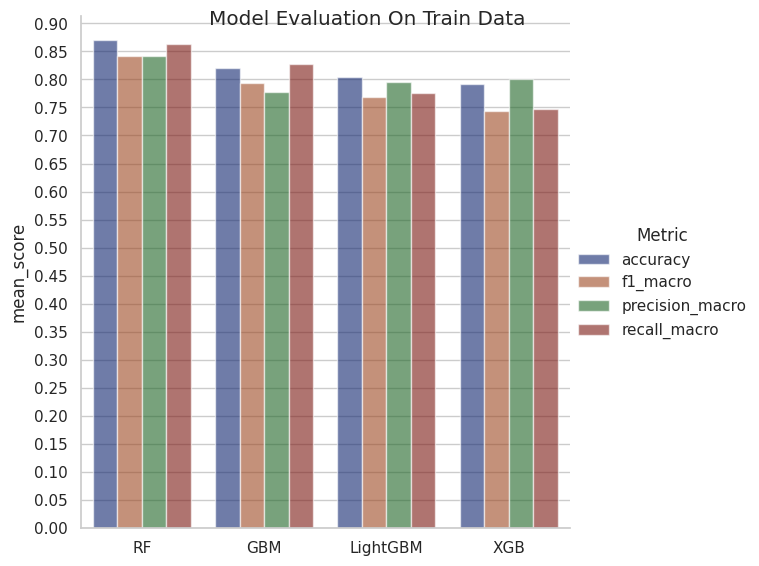

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=train_viz_data,
    kind="bar",
    x="model_name",
    y="train_mean",
    hue="eval_metric",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "mean_score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Train Data\n")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

## 6.3 Model Selection
Evaluation on Test Data

In [ ]:
import pickle

# Define a list to store the loaded models
loaded_models = []

# Define the list of model names
model_names = ['RF', 'GBM', 'LightGBM', 'XGB']

# Iterate over each model name
for model_name in model_names:
    # Specify the file path of the corresponding .pkl file
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load() to deserialize and load the model from the file
        loaded_model = pickle.load(file)

        # Append the loaded model to the list of loaded models
        loaded_models.append((model_name, loaded_model))

In [ ]:
# Define lists to store the evaluation metrics for each model
accuracies = []
f1_scores = []
precisions = []
recalls = []

# Iterate over each loaded model
for model_name, loaded_model in loaded_models:
    # Predict using the loaded model on the test data
    y_pred = loaded_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append((model_name, accuracy))
    f1_scores.append((model_name, f1))
    precisions.append((model_name, precision))
    recalls.append((model_name, recall))

evaluation_results = pd.DataFrame({
    'Model': [model_name for model_name, _ in loaded_models],
    'Accuracy': [accuracy for _, accuracy in accuracies],
    'F1 Score': [f1 for _, f1 in f1_scores],
    'Precision': [precision for _, precision in precisions],
    'Recall': [recall for _, recall in recalls],
})

# Print the DataFrame
evaluation_results

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,Model,Accuracy,F1 Score,Precision,Recall
0,RF,0.909091,0.872727,0.857143,0.888889
1,GBM,0.909091,0.872727,0.857143,0.888889
2,LightGBM,0.909091,0.877193,0.833333,0.925926
3,XGB,0.909091,0.867925,0.884615,0.851852


In [ ]:
# Melt the evaluation_results DataFrame
melted_evaluation_results = pd.melt(
    evaluation_results,
    id_vars=['Model'],
    value_vars=['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    var_name='Metric',
    value_name='Value'
)

# Print the melted DataFrame
melted_evaluation_results

,Model,Metric,Value
0,RF,Accuracy,0.909091
1,GBM,Accuracy,0.909091
2,LightGBM,Accuracy,0.909091
3,XGB,Accuracy,0.909091
4,RF,F1 Score,0.872727
5,GBM,F1 Score,0.872727
6,LightGBM,F1 Score,0.877193
7,XGB,F1 Score,0.867925
8,RF,Precision,0.857143
9,GBM,Precision,0.857143


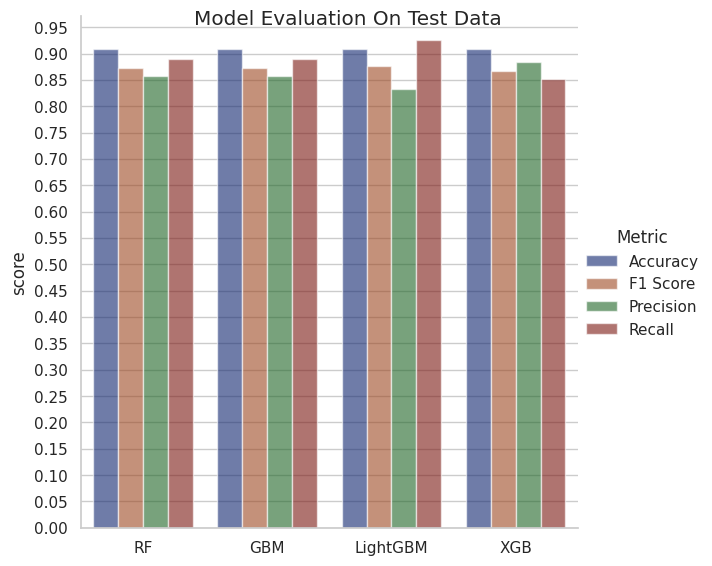

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=melted_evaluation_results,
    kind="bar",
    x="Model",
    y="Value",
    hue="Metric",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Test Data")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

Best Model: Bandingkan Recall Training vs Testing (Overfitting Comparison)

model? => Recall = ...

## 6.4 Models Performance Comparison (Train vs. Test

In [ ]:
train_viz_data.head()

,model_name,eval_metric,train_mean
0,RF,accuracy,0.870000
1,RF,f1_macro,0.841584
2,RF,precision_macro,0.841421
3,RF,recall_macro,0.863544
4,GBM,accuracy,0.820000


In [ ]:
train_viz_data.columns = melted_evaluation_results.columns

In [ ]:
train_viz_data.head()

,Model,Metric,Value
0,RF,accuracy,0.870000
1,RF,f1_macro,0.841584
2,RF,precision_macro,0.841421
3,RF,recall_macro,0.863544
4,GBM,accuracy,0.820000


In [ ]:
train_viz_data["Metric"].unique()

array(['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
      dtype=object)

In [ ]:
replace_mapping = {
    'accuracy': 'Accuracy',
    'f1_macro': 'F1 Score',
    'precision_macro': 'Precision',
    'recall_macro': 'Recall'
}

train_viz_data['Metric'] = train_viz_data['Metric'].replace(replace_mapping)

In [ ]:
train_viz_data.rename({"Value": "Training Score"}, axis=1, inplace=True)
melted_evaluation_results.rename({"Value": "Testing Score"}, axis=1, inplace=True)

In [ ]:
melted_evaluation_results.head()

,Model,Metric,Testing Score
0,RF,Accuracy,0.909091
1,GBM,Accuracy,0.909091
2,LightGBM,Accuracy,0.909091
3,XGB,Accuracy,0.909091
4,RF,F1 Score,0.872727


In [ ]:
train_viz_data

,Model,Metric,Training Score
0,RF,Accuracy,0.870000
1,RF,F1 Score,0.841584
2,RF,Precision,0.841421
3,RF,Recall,0.863544
4,GBM,Accuracy,0.820000
5,GBM,F1 Score,0.794336
6,GBM,Precision,0.778175
7,GBM,Recall,0.827088
8,LightGBM,Accuracy,0.805000
9,LightGBM,F1 Score,0.769242


In [ ]:
# Merge DataFrame berdasarkan kunci "Model" dan "Metric"
merged_eval_df = train_viz_data.merge(
    melted_evaluation_results,
    on=['Model', 'Metric']
)

# Tampilkan hasil penggabungan
merged_eval_df.head()

,Model,Metric,Training Score,Testing Score
0,RF,Accuracy,0.870000,0.909091
1,RF,F1 Score,0.841584,0.872727
2,RF,Precision,0.841421,0.857143
3,RF,Recall,0.863544,0.888889
4,GBM,Accuracy,0.820000,0.909091


In [ ]:
metric_opt = "Recall"

print(merged_eval_df[merged_eval_df["Metric"] == metric_opt])

       Model  Metric  Training Score  Testing Score
3         RF  Recall        0.863544       0.888889
7        GBM  Recall        0.827088       0.888889
11  LightGBM  Recall        0.775733       0.925926
15       XGB  Recall        0.748040       0.851852


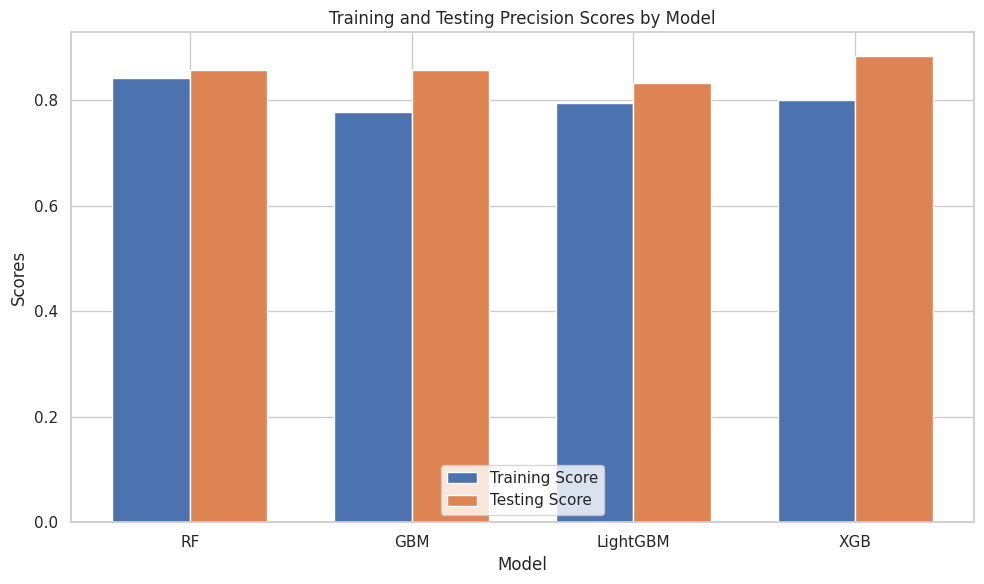

In [ ]:
metric_opt = "Precision"
data_to_plot = merged_eval_df[merged_eval_df["Metric"] == metric_opt]

# Data
models = list(data_to_plot["Model"])
metrics = ['Training Score', 'Testing Score']
train_scores = list(data_to_plot["Training Score"])
test_scores = list(data_to_plot["Testing Score"])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))

# Plot bar untuk skor pelatihan
train_bars = ax.bar(
    index,
    train_scores,
    bar_width,
    label='Training Score'
)

# Plot bar untuk skor pengujian
test_bars = ax.bar(
    [i + bar_width for i in index],
    test_scores,
    bar_width,
    label='Testing Score'
)

# Tambahkan label dan judul
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title(f'Training and Testing {metric_opt} Scores by Model')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend(loc='lower center')

# Tampilkan plot
plt.tight_layout()
plt.show()

# 7.&nbsp;Storytelling:
Deskripsikan (Ringkas Semua) semua proses dari bagian 1 sampai 6





1. **Data Collection:**

  Dataset "Pima Indians Diabetes Database" yang digunakan terdiri dari 768 baris dan 9 kolom. Data ini mencakup fitur-fitur medis seperti jumlah kehamilan, glukosa, tekanan darah, ketebalan kulit, insulin, BMI, riwayat diabetes, umur, dan kolom target yang menunjukkan apakah pasien menderita diabetes (1) atau tidak (0). Data ini dimuat ke dalam DataFrame menggunakan pandas untuk mempermudah analisis dan pemrosesan selanjutnya.

2. **Exploratory Data Analysis (EDA):**

  Pada tahap ini, data yang tidak valid atau hilang diselidiki, yaitu nilai nol yang tidak realistis pada fitur-fitur medis seperti glukosa, tekanan darah, ketebalan kulit, insulin, dan BMI.. Proses ini memastikan bahwa data yang hilang atau tidak valid akan diperbaiki sehingga siap digunakan dalam pelatihan model. Dataset ini mencakup berbagai fitur terkait faktor risiko diabetes, seperti Glucose, BloodPressure, dan BMI. Statistik deskriptif memberikan gambaran umum tentang distribusi data, menunjukkan bahwa rata-rata Glucose adalah 120.89 mg/dL dengan deviasi standar 31.97, sementara rata-rata BloodPressure adalah 69.10 mmHg dengan deviasi standar 19.36. Rata-rata BMI adalah 31.99 dengan deviasi standar 7.88, menunjukkan variasi yang cukup besar di antara individu.

3. **Data Visualization:**

  Proses dimulai dengan mmemahami pola dan hubungan antar fitur, berbagai visualisasi digunakan. Histogram dan boxplot menunjukkan distribusi data serta adanya outliers, dengan histogram Glucose yang menunjukkan distribusi miring ke kanan dan beberapa nilai ekstrim tinggi. Scatter plot antara Glucose dan BMI mengungkapkan pola positif, di mana nilai Glucose yang lebih tinggi sering dikaitkan dengan BMI yang lebih tinggi. Heatmap menunjukkan adanya korelasi positif antara Glucose dan BMI, serta antara BloodPressure dan Age. Analisis juga melibatkan identifikasi missing values dan outliers untuk memastikan integritas data. Tidak ditemukan missing values pada dataset, namun beberapa outliers ditemukan, terutama pada fitur Glucose dan BMI, yang dapat mempengaruhi hasil analisis dan perlu perhatian lebih lanjut.

4. **Model Prepocessing:**

  Proses data preprocessing dimulai dengan penanganan missing values dan outliers. Pertama, untuk menangani missing values, dilakukan imputasi dengan mengganti nilai yang hilang dengan median dari masing-masing fitur. Pendekatan ini dipilih karena median lebih robust terhadap outliers dibandingkan mean. Setelah itu, dilakukan identifikasi dan penanganan outliers. Outliers diidentifikasi menggunakan metode z-score, di mana nilai z-score di luar rentang -3 dan 3 dianggap sebagai outlier. Beberapa outliers ditemukan pada fitur seperti Glucose dan BMI, dan mereka ditangani dengan menggantikan outliers tersebut dengan nilai persentil 5 dan 95 dari distribusi fitur tersebut untuk menjaga data tetap konsisten.

5. **Feature Engineering:**

  Pada tahap ini, dilakukan transformasi pada beberapa fitur untuk meningkatkan performa model. Pertama, dibuat fitur baru 'New_Glucose_Class' yang mengklasifikasikan tingkat glukosa ke dalam dua kategori: "Normal" dan "Pre-Diabetes". Hasil klasifikasi menunjukkan bahwa 74.09% data termasuk dalam kategori "Normal" dan 25.91% termasuk dalam kategori "Pre-Diabetes". Selanjutnya, dibuat fitur 'New_BMI_Range' yang membagi nilai BMI menjadi empat kategori: "Underweight", "Healthy", "Overweight", dan "Obese". Hasilnya menunjukkan bahwa sebagian besar data (62.89%) termasuk dalam kategori "Obese", diikuti oleh "Overweight" (23.31%), "Healthy" (13.28%), dan "Underweight" (0.52%).

  Fitur 'New_BloodPressure' juga dibagi menjadi tiga kategori: "Normal", "HS1", dan "HS2". Sebagian besar data (73.31%) termasuk dalam kategori "Normal", sedangkan 18.88% dalam kategori "HS1" dan 7.81% dalam kategori "HS2". Untuk fitur 'SkinThickness', dibuat fitur baru 'New_SkinThickness' yang bernilai 1 jika ketebalan kulit kurang dari atau sama dengan 18, dan 0 jika lebih. Hasilnya menunjukkan bahwa 87.89% data memiliki nilai 0 dan 12.11% memiliki nilai 1.

  Semua fitur kategorikal baru ini kemudian diubah menjadi variabel dummy menggunakan one-hot encoding, sehingga fitur-fitur seperti 'New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure', dan 'New_SkinThickness' diubah menjadi representasi numerik biner. Selanjutnya, dilakukan scaling pada fitur numerik menggunakan RobustScaler untuk memastikan semua fitur berada pada skala yang sama. Fitur-fitur yang di-scale termasuk 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', dan 'Age'.

6. **Hyperparameter Tuning:**

  Dalam proses evaluasi model ini, langkah pertama adalah mempersiapkan data untuk pelatihan dan pengujian. Variabel `X` diambil dari dataframe dengan menghapus kolom "Outcome", sedangkan variabel `y` adalah kolom "Outcome". Data kemudian dibagi menjadi set pelatihan dan pengujian dengan 10% data untuk pengujian dan menggunakan stratifikasi berdasarkan label untuk menjaga proporsi kelas. Proporsi kelas pada data pelatihan adalah 65.12% untuk kelas 0 dan 34.88% untuk kelas 1, sedangkan pada data pengujian, proporsinya adalah 64.94% untuk kelas 0 dan 35.06% untuk kelas 1.

  Selanjutnya, berbagai model klasifikasi seperti Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Classifier, XGBoost, Gradient Boosting, dan LightGBM dievaluasi menggunakan K-Fold Cross Validation dengan 10 lipatan. Metrik evaluasi yang digunakan meliputi akurasi, f1-macro, precision-macro, dan recall-macro. Hasil evaluasi menunjukkan bahwa model LightGBM memiliki rata-rata recall-macro tertinggi sebesar 0.8583 dengan deviasi standar 0.0499, diikuti oleh XGBoost dengan recall-macro 0.8535 dan deviasi standar 0.0477, serta Gradient Boosting dengan recall-macro 0.8498 dan deviasi standar 0.0617. Model Random Forest dan Support Vector Classifier juga menunjukkan performa yang baik dengan recall-macro masing-masing 0.8451 dan 0.8382.
  
  Untuk meningkatkan kinerja model, tuning hiperparameter dilakukan pada model Gradient Boosting, LightGBM, Random Forest, dan XGBoost menggunakan GridSearchCV. Hasil tuning menunjukkan parameter terbaik untuk masing-masing model. Model-model ini kemudian disimpan menggunakan pickle untuk keperluan evaluasi lebih lanjut.

  Evaluasi akhir model dilakukan dengan menggunakan data pengujian. Model Random Forest yang telah dituning menghasilkan akurasi 0.9091 dan model lain seperti Gradient Boosting, LightGBM, dan XGBoost juga memberikan hasil akurasi 0.9091. Dengan variasi dalam precision, recall, dan F1 score. LightGBM menunjukkan hasil recall tertinggi 0.9259, namun dengan precision yang sedikit lebih rendah dibandingkan XGBoost. Data evaluasi akhir ini dimvisualisasikan untuk membandingkan metrik kinerja model. Grafik batang menunjukkan rata-rata skor dari metrik evaluasi seperti akurasi, F1 score, precision, dan recall untuk setiap model. Hasil akhir menunjukkan bahwa LightGBM memiliki recall terbaik, sementara XGBoost memiliki precision terbaik.

# 8.&nbsp;Conclusion:
Berikut adalah lima poin kesimpulan yang disesuaikan tanpa menyebutkan angka spesifik:

1. **Efektivitas Pra-pemrosesan:**
   Penanganan nilai-nilai nol yang tidak realistis pada fitur medis, seperti glukosa, tekanan darah, dan BMI, dengan mengganti nilai-nilai tersebut menggunakan median terbukti meningkatkan kualitas data. Proses ini memastikan data lebih konsisten dan valid untuk analisis lebih lanjut. Penggantian nilai-nilai yang tidak realistis dan outliers membantu menghasilkan data yang lebih bersih dan model yang lebih akurat dalam melakukan prediksi.

2. **Performa Model:**
   Dari berbagai model klasifikasi yang diuji, LightGBM menunjukkan performa terbaik dalam hal recall, yang mencerminkan kemampuannya untuk menangkap sebanyak mungkin kasus positif. Model ini juga menunjukkan akurasi yang tinggi. LightGBM efektif dalam menangani pola-pola kompleks dalam data, memberikan hasil yang lebih akurat dalam klasifikasi diabetes dibandingkan dengan beberapa model lainnya.

3. **Pentingnya Tuning Hiperparameter:**
   Tuning hiperparameter terbukti sangat penting untuk meningkatkan kinerja model. Dengan menyesuaikan parameter seperti jumlah pohon atau kedalaman model, performa model mengalami peningkatan signifikan. Proses ini menunjukkan betapa pentingnya penyesuaian parameter untuk mendapatkan model yang optimal dan sesuai dengan data yang tersedia.

4. **Analisis Fitur dan Korelasi:**
   Analisis eksploratif data menunjukkan bahwa beberapa fitur, seperti glukosa, BMI, dan tekanan darah, memiliki hubungan yang kuat dengan status diabetes. Fitur-fitur ini berkontribusi signifikan terhadap pemahaman faktor-faktor risiko diabetes. Informasi ini berguna untuk mengidentifikasi faktor-faktor utama yang mempengaruhi risiko dan membantu dalam pengembangan model yang lebih efisien di masa depan.

5. **Pemilihan Model Berdasarkan Kebutuhan Spesifik:**
   Hasil evaluasi menunjukkan bahwa pemilihan model harus disesuaikan dengan kebutuhan spesifik dari aplikasi. Beberapa model mungkin unggul dalam hal akurasi dan recall, sementara model lain mungkin lebih baik dalam hal interpretabilitas atau precision. Oleh karena itu, penting untuk mempertimbangkan trade-off antara berbagai metrik kinerja seperti akurasi, recall, dan precision, serta kompleksitas model untuk mencapai hasil yang optimal sesuai dengan tujuan analisis.